In [2]:
import numpy as np
import pandas as pd

import math
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, log_loss
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [91]:
dataset = './WA_Fn-UseC_-Telco-Customer-Churn.csv'

df = pd.read_csv(dataset)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [5]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [11]:
df.iloc[600]

customerID                       5839-SUYVZ
gender                                 Male
SeniorCitizen                             0
Partner                                  No
Dependents                               No
tenure                                   16
PhoneService                            Yes
MultipleLines                            No
InternetService                 Fiber optic
OnlineSecurity                           No
OnlineBackup                             No
DeviceProtection                         No
TechSupport                             Yes
StreamingTV                              No
StreamingMovies                          No
Contract                     Month-to-month
PaperlessBilling                        Yes
PaymentMethod       Credit card (automatic)
MonthlyCharges                        74.55
TotalCharges                         1170.5
Churn                                    No
Name: 600, dtype: object

In [30]:
for i in range(21):
    name=df.columns[i]
    items=str(df.iloc[:,i].unique())
    print(name+"       "+items)

customerID       ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender       ['Female' 'Male']
SeniorCitizen       [0 1]
Partner       ['Yes' 'No']
Dependents       ['No' 'Yes']
tenure       [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService       ['No' 'Yes']
MultipleLines       ['No phone service' 'No' 'Yes']
InternetService       ['DSL' 'Fiber optic' 'No']
OnlineSecurity       ['No' 'Yes' 'No internet service']
OnlineBackup       ['Yes' 'No' 'No internet service']
DeviceProtection       ['No' 'Yes' 'No internet service']
TechSupport       ['No' 'Yes' 'No internet service']
StreamingTV       ['No' 'Yes' 'No internet service']
StreamingMovies       ['No' 'Yes' 'No internet service']
Contract       ['Month-to-month' 'One year' 'Two year']
PaperlessBilling       ['Ye

In [95]:
df.OnlineSecurity = df.OnlineSecurity.apply(lambda value: value if not value=='No internet service' else 'No')
df.OnlineBackup = df.OnlineBackup.apply(lambda value: value if not value=='No internet service' else 'No')
df.DeviceProtection = df.DeviceProtection.apply(lambda value: value if not value=='No internet service' else 'No')
df.TechSupport = df.TechSupport.apply(lambda value: value if not value=='No internet service' else 'No')
df.StreamingTV = df.StreamingTV.apply(lambda value: value if not value=='No internet service' else 'No')
df.StreamingMovies = df.StreamingMovies.apply(lambda value: value if not value=='No internet service' else 'No')

In [83]:
for i in range(7042):
    if df.TotalCharges[i]==' ':
        ten=df.tenure[i]
        mc=df.MonthlyCharges[i]
        tc=ten*mc
        print(str(i)+'th element, with tenure of '+str(ten)+' months and monthly charge of '+str(mc)+', give us a total charge of '+str(tc))

488 element, with tenure of 0 months and monthly charge of 52.55, give us a total charge of 0.0
753 element, with tenure of 0 months and monthly charge of 20.25, give us a total charge of 0.0
936 element, with tenure of 0 months and monthly charge of 80.85, give us a total charge of 0.0
1082 element, with tenure of 0 months and monthly charge of 25.75, give us a total charge of 0.0
1340 element, with tenure of 0 months and monthly charge of 56.05, give us a total charge of 0.0
3331 element, with tenure of 0 months and monthly charge of 19.85, give us a total charge of 0.0
3826 element, with tenure of 0 months and monthly charge of 25.35, give us a total charge of 0.0
4380 element, with tenure of 0 months and monthly charge of 20.0, give us a total charge of 0.0
5218 element, with tenure of 0 months and monthly charge of 19.7, give us a total charge of 0.0
6670 element, with tenure of 0 months and monthly charge of 73.35, give us a total charge of 0.0
6754 element, with tenure of 0 mont

In [96]:
#Cleaning null values
df.TotalCharges = df.TotalCharges.apply(lambda value: value if not value == ' ' else 0).astype('float64')

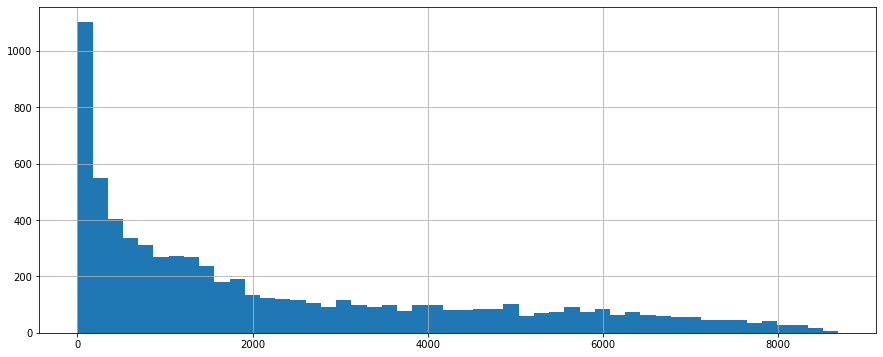

In [85]:
fig, ax = plt.subplots(figsize=(15, 6))
#sns.distplot(df.TotalCharges, ax=ax)
df.TotalCharges.hist(bins=50, figsize=(15, 6))
plt.show()

In [97]:

bins = [-1, 10, 20, 30, 40, 50, 60, np.inf]
labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', 'gt60']

df['tenure'] = pd.cut(df.tenure, bins, labels=labels)

In [98]:

bins = [10, 28, 46, 64, 82, 100, np.inf]
labels = ['10-28','28-46', '46-64', '64-82', '82-100', 'gt100']

df['MonthlyCharges'] = pd.cut(df.MonthlyCharges, bins, labels=labels)

In [99]:

df['TotalCharges'] = pd.qcut(df.TotalCharges, q=5, labels=['Qtl_'+x for x in ['20', '40', '60', '80', '100']])

In [101]:
categoricals = ['gender', 'Partner', 'Dependents', 'MultipleLines', 'OnlineSecurity',
                'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                'PaperlessBilling', 'tenure', 'TotalCharges', 'MonthlyCharges']

dummies = ['Contract', 'PaymentMethod', 'InternetService']

In [102]:
num_df = pd.get_dummies(df[dummies])

for cat_column in categoricals:
    text_label = LabelEncoder()
    num_label = text_label.fit_transform(df[cat_column])
    num_df[cat_column + '_cat'] = num_label

In [103]:
df = pd.concat([df, num_df], axis=1)

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,OnlineSecurity_cat,OnlineBackup_cat,DeviceProtection_cat,TechSupport_cat,StreamingTV_cat,StreamingMovies_cat,PaperlessBilling_cat,tenure_cat,TotalCharges_cat,MonthlyCharges_cat
0,7590-VHVEG,Female,0,Yes,No,0-10,No,No phone service,DSL,No,...,0,1,0,0,0,0,1,0,1,1
1,5575-GNVDE,Male,0,No,No,31-40,Yes,No,DSL,Yes,...,1,0,1,0,0,0,0,3,3,2
2,3668-QPYBK,Male,0,No,No,0-10,Yes,No,DSL,Yes,...,1,1,0,0,0,0,1,0,1,2
3,7795-CFOCW,Male,0,No,No,41-50,No,No phone service,DSL,Yes,...,1,0,1,1,0,0,0,4,3,1
4,9237-HQITU,Female,0,No,No,0-10,Yes,No,Fiber optic,No,...,0,0,0,0,0,0,1,0,1,3


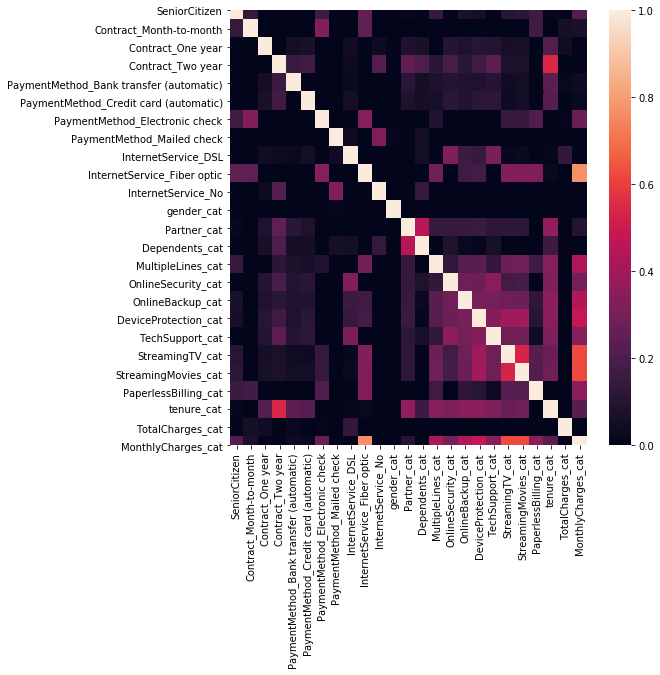

In [106]:
fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(df.corr(), vmin=0, ax=ax)
plt.show()

In [107]:
data = df[[
    'SeniorCitizen', 'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year',
    'PaymentMethod_Bank transfer (automatic)', 'PaymentMethod_Credit card (automatic)',
    'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
    'InternetService_DSL', 'InternetService_Fiber optic', 'InternetService_No', 
    'gender_cat', 'Partner_cat', 'Dependents_cat', 'MultipleLines_cat', 
    'OnlineSecurity_cat', 'OnlineBackup_cat', 'DeviceProtection_cat', 'TechSupport_cat',
    'StreamingTV_cat', 'StreamingMovies_cat', 'PaperlessBilling_cat',
    'tenure_cat', 'TotalCharges_cat', 'MonthlyCharges_cat'
          ]]
label = df['Churn']

## Modelling

In [148]:
x_train, x_test, y_train, y_test = train_test_split(data, label, test_size=0.2)
from sklearn.model_selection import GridSearchCV

### Grid search cross-validation for a Logistic Regression model

In [137]:
modelLR = LogisticRegression()

param_grid = { 
    'penalty': ['l1', 'l2'],
    'C' : [0.5, 1, 1.5],
    'solver' : ['liblinear', 'saga']
}
cv_lr=GridSearchCV(estimator=modelLR, param_grid=param_grid, cv=5, scoring='neg_log_loss')
cv_lr.fit(x_train,y_train)

C:\Users\Victor\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Victor\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Victor\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Victor\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Victor\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.5, 1, 1.5], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             scoring='neg_log_loss')

In [138]:
cv_lr.best_params_

{'C': 0.5, 'penalty': 'l1', 'solver': 'saga'}

In [184]:
modelLR = LogisticRegression(penalty='l1', solver='saga', C=0.5)
modelLR.fit(x_train, y_train)

predictLR = modelLR.predict(x_test)
log_loss(y_pred=yn(predictLR), y_true=yn(y_test))

6.643074209477313

### Grid search cross-validation for a Random Forest Classifier

In [145]:
modelRF = RandomForestClassifier()

param_grid = { 
    'n_estimators': [50, 100, 250, 500],
    'max_depth' : [3,4,5, None],
    'max_features' : ['auto', 'sqrt', 'log2'],
    'criterion' : ['gini','entropy']
}
cv_rf=GridSearchCV(estimator=modelRF, param_grid=param_grid, cv=5, scoring='neg_log_loss')
cv_rf.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, None],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [50, 100, 250, 500]},
             scoring='neg_log_loss')

In [146]:
cv_rf.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'sqrt',
 'n_estimators': 500}

In [176]:
modelRF = RandomForestClassifier(criterion='gini', max_depth=10, max_features='sqrt', n_estimators=500)
modelRF.fit(x_train, y_train)

predictRF = modelRF.predict(x_test)
log_loss(y_pred=yn(predictRF), y_true=yn(y_test))

6.863687545154826

### Grid search cross-validation for a Gradient Boosting Classifier

In [187]:
modelGB = GradientBoostingClassifier()

param_grid = { 
    'n_estimators': [50, 100, 250, 500],
    'loss' : ['deviance', 'exponential'],
    'max_features' : ['auto', 'sqrt', 'log2'],
    'criterion' : ['mse', 'friedman_mse']
}
cv_gb=GridSearchCV(estimator=modelGB, param_grid=param_grid, cv=3, scoring='neg_log_loss')
cv_gb.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(),
             param_grid={'criterion': ['mse', 'friedman_mse'],
                         'loss': ['deviance', 'exponential'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [50, 100, 250, 500]},
             scoring='neg_log_loss')

In [188]:
cv_gb.best_params_

{'criterion': 'friedman_mse',
 'loss': 'deviance',
 'max_features': 'log2',
 'n_estimators': 100}

In [189]:
modelGB = GradientBoostingClassifier(criterion='friedman_mse', loss='deviance', max_features='log2')
modelGB.fit(x_train, y_train)

predictGB = modelGB.predict(x_test)
log_loss(y_pred=yn(predictGB), y_true=yn(y_test))

6.569531323482465

### Classification report

In [182]:
print('Logistic Regression: \n', classification_report(predictLR, y_test))
print('Logistic Regression Accuracy: ', accuracy_score(predictLR, y_test))

predictRF = modelRF.predict(x_test)
print('Random Forest Classifier : \n', classification_report(predictRF, y_test))
print('Random Forest Classifier Accuracy: ', accuracy_score(predictRF, y_test))

predictGB = modelGB.predict(x_test)
print('Gradient Boost Classifier : \n', classification_report(predictGB, y_test))
print('Gradient Boost Classifier Accuracy: ', accuracy_score(predictGB, y_test))

Logistic Regression: 
               precision    recall  f1-score   support

          No       0.79      0.73      0.76      1112
         Yes       0.21      0.26      0.23       297

    accuracy                           0.63      1409
   macro avg       0.50      0.50      0.50      1409
weighted avg       0.67      0.63      0.65      1409

Logistic Regression Accuracy:  0.6344925479063165
Random Forest Classifier : 
               precision    recall  f1-score   support

          No       0.91      0.84      0.87      1121
         Yes       0.51      0.66      0.58       288

    accuracy                           0.80      1409
   macro avg       0.71      0.75      0.72      1409
weighted avg       0.82      0.80      0.81      1409

Random Forest Classifier Accuracy:  0.801277501774308
Gradient Boost Classifier : 
               precision    recall  f1-score   support

          No       0.90      0.85      0.87      1107
         Yes       0.54      0.67      0.60       3

In [123]:
def yn(res):
    out=[]
    for i in res:
        if i == 'Yes':
            out.append(1)
        else:
            out.append(0)
    return out

In [185]:
print('Log-loss LR model: ', log_loss(y_pred=yn(predictLR), y_true=yn(y_test)))
print('Log-loss RF model: ', log_loss(y_pred=yn(predictRF), y_true=yn(y_test)))
print('Log-loss GB model: ', log_loss(y_pred=yn(predictGB), y_true=yn(y_test)))
print('Log-loss 0 model: ', log_loss(y_pred=[0 for i in range(len(y_test))], y_true=yn(y_test)))

Log-loss LR model:  6.643074209477313
Log-loss RF model:  6.863687545154826
Log-loss GB model:  6.618558968324274
Log-loss 0 model:  9.11882527956478
